In [1]:
import os
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.Alphabet import IUPAC
from Bio.SeqRecord import SeqRecord
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
GNames = []

class Genome:
    
    def __init__(self, name):
        self.name = name
        self.ctglens = []
    def addseq(self, ctglen):
        self.ctglens.append(ctglen)

for root, dirs, files in os.walk('./'):
    for file in files:
        if (root=='./' and file.endswith('.fasta')):
            fileloc = root + '/' + file
            name = 'file_'+file.split('.')[0]
            GNames.append(name)
            t = name+'=Genome(name)'
            exec(t)
            for record in SeqIO.parse(fileloc, 'fasta'):
                t = name+'.addseq(int(len(record.seq)))'
                exec (t)           

In [25]:
print (len(GNames))

88


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/axes/_subplots.py:69: MatplotlibDeprecationWarning: The use of 0 (which ends up being the _last_ sub-plot) is deprecated in 1.4 and will raise an error in 1.5
  mplDeprecation)


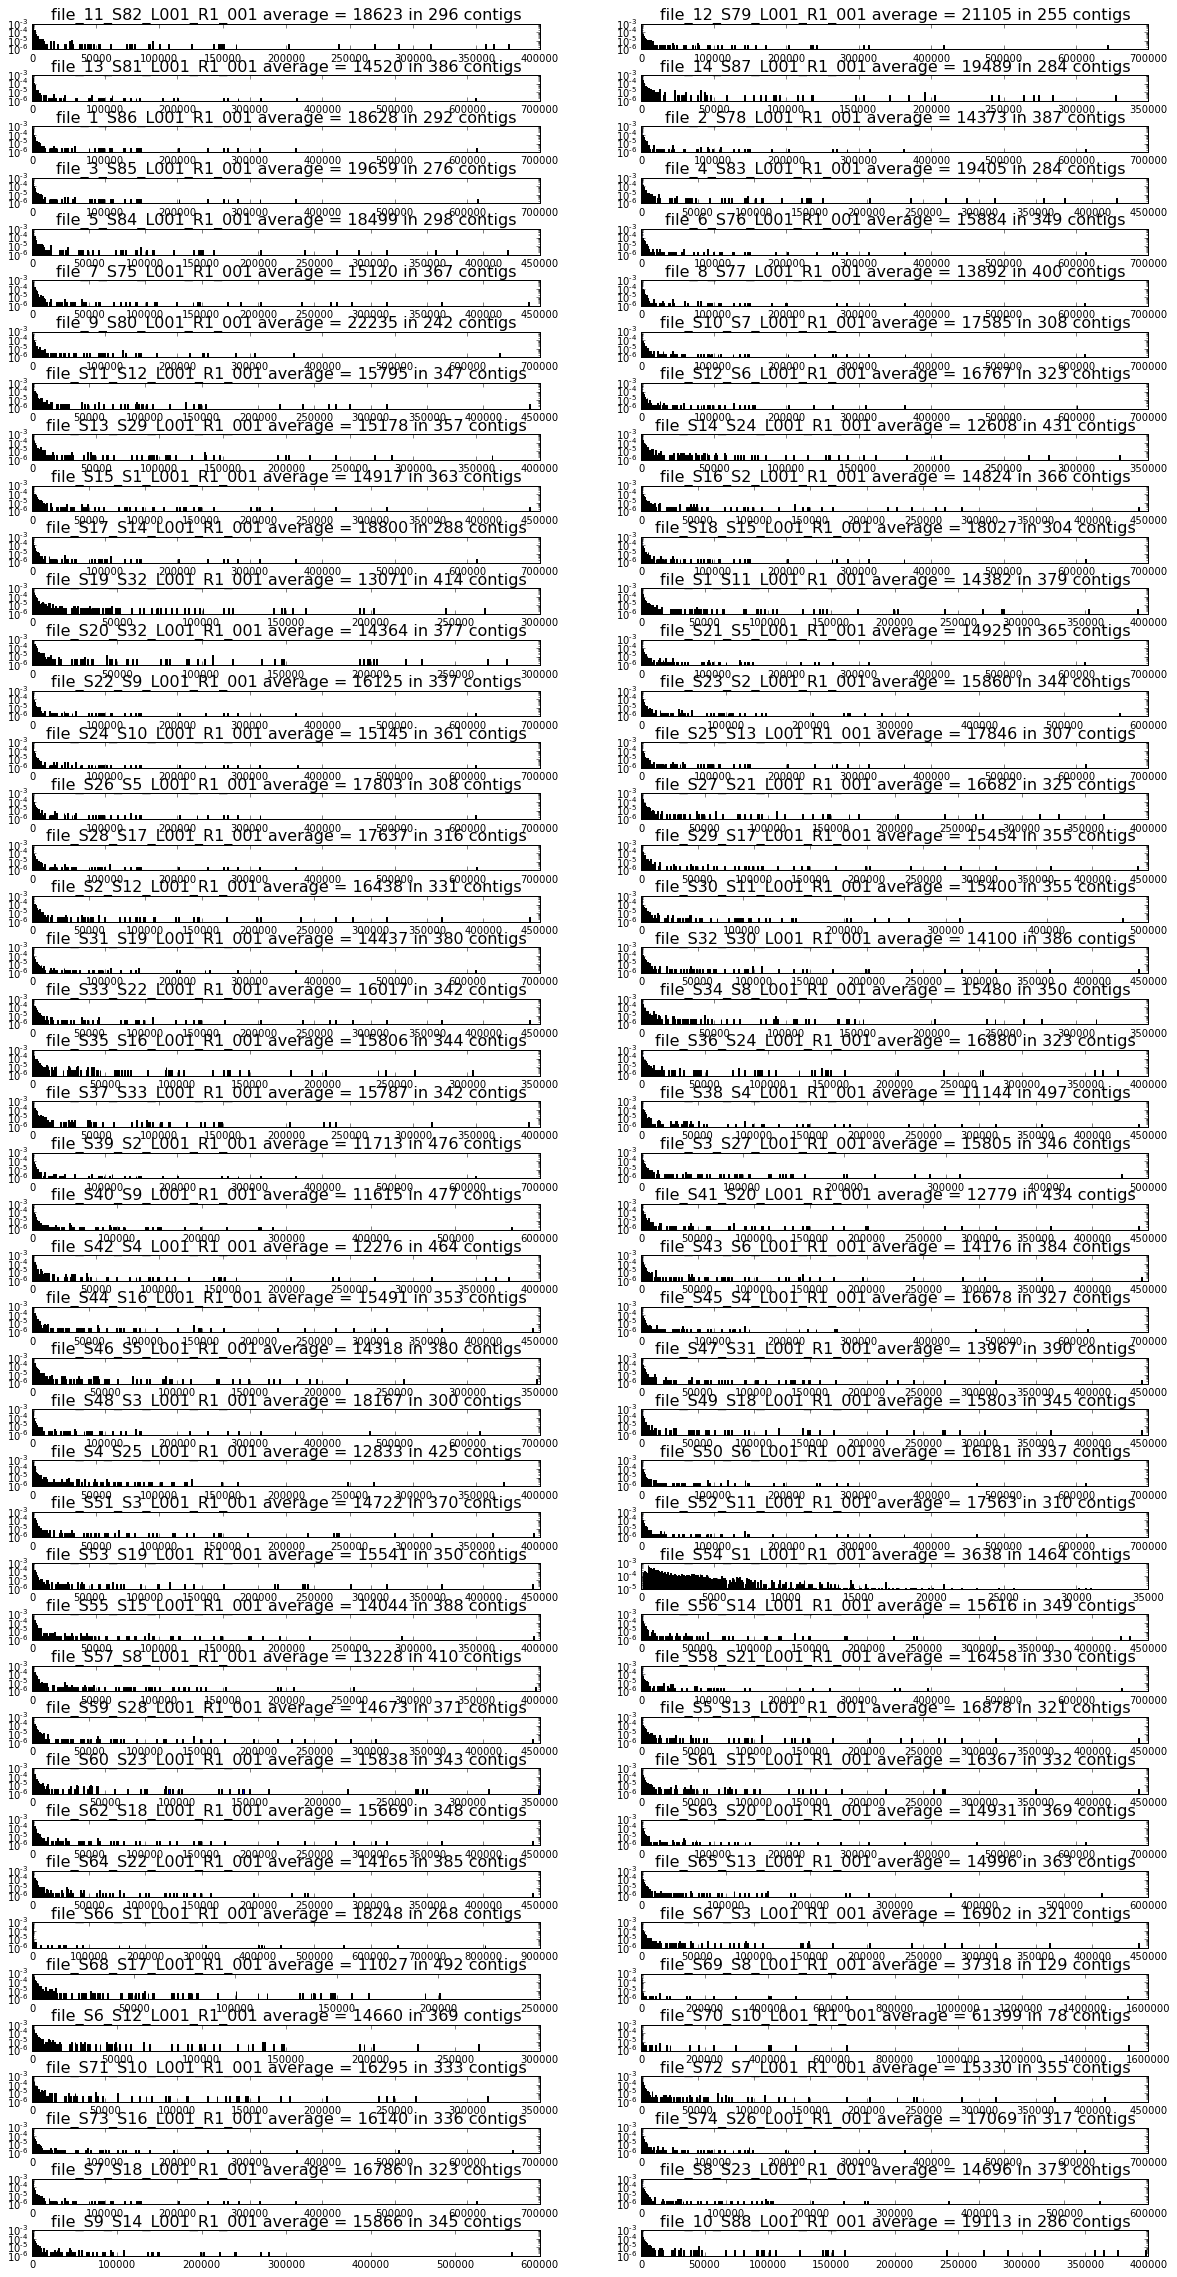

In [28]:
b = list(range(1,1000))
c = [i*100 for i in b]
c=500

plt.figure(figsize=(20,40))

for g in GNames:
    ind = GNames.index(g)
    tot = len(GNames)
    if tot%2 == 0:
        nrows = tot/2
    else:
        nrows = (tot+1)/2
    plt.subplot(nrows, 2, ind)
    t = 'plt.hist('+g+'.ctglens, bins = c, normed = \'true\', histtype = \'bar\', log = True)'
    exec(t)
    m = 'ctglens ='+g+'.ctglens'
    exec (m)
    txt = 'average = '+str("{0:.0f}".format(sum(ctglens)/len(ctglens)))+' in '+str(len(ctglens))+' contigs'
    plt.title(g+' '+txt, fontsize = 16)
plt.subplots_adjust(hspace=1)
plt.savefig('hists.png')
plt.savefig('hists.pdf')

In [5]:
for g in GNames:
    tot = len(GNames)
    m = 'ctglens ='+g+'.ctglens'
    exec (m)
    txt = 'average = '+str("{0:.0f}".format(sum(ctglens)/len(ctglens)))+' in '+str(len(ctglens))+' contigs'
    print(g+':'+txt)
    

file_10_S88_L001_R1_001:average = 19113 in 286 contigs
file_11_S82_L001_R1_001:average = 18623 in 296 contigs
file_12_S79_L001_R1_001:average = 21105 in 255 contigs
file_13_S81_L001_R1_001:average = 14520 in 386 contigs
file_14_S87_L001_R1_001:average = 19489 in 284 contigs
file_1_S86_L001_R1_001:average = 18628 in 292 contigs
file_2_S78_L001_R1_001:average = 14373 in 387 contigs
file_3_S85_L001_R1_001:average = 19659 in 276 contigs
file_4_S83_L001_R1_001:average = 19405 in 284 contigs
file_5_S84_L001_R1_001:average = 18499 in 298 contigs
file_6_S76_L001_R1_001:average = 15884 in 349 contigs
file_7_S75_L001_R1_001:average = 15120 in 367 contigs
file_8_S77_L001_R1_001:average = 13892 in 400 contigs
file_9_S80_L001_R1_001:average = 22235 in 242 contigs
file_S10_S7_L001_R1_001:average = 17585 in 308 contigs
file_S11_S12_L001_R1_001:average = 15795 in 347 contigs
file_S12_S6_L001_R1_001:average = 16767 in 323 contigs
file_S13_S29_L001_R1_001:average = 15178 in 357 contigs
file_S14_S24_L001

Code above is clunky new code below, INCLUDING! coverage data (spades has this information in the header)

In [21]:
#dictionary -> filename:[(leng,cov),(leng,cov), (leng,cov)...]
#where leng is the contig length, cov = coverage as reproted by SPAdes

lendict = {}
for root, dirs, files in os.walk('./'):
    for file in files:
        if root=='./' and file.endswith('.fasta'):
            fileloc = root + '/' + file
            name = 'file_'+file.split('.')[0]
            GNames.append(name)
            lendict[name] = []
            for record in SeqIO.parse(fileloc, 'fasta'):
                leng = float(len(record.seq))
                cov = float(record.id.split('cov_')[1].split('_ID')[0])
                lendict[name].append((leng,cov))

In [23]:
#make list of lengths, and adjusted coverages (coverage average * length), for lengths over 500b
#divide the 
lens = []
covs = []
for item in lendict:
    lens = []
    covs = []
    for entry in lendict[item]:
        if entry[0]>=500:
            lens.append(entry[0])
            covs.append(entry[0]*entry[1])
    print(item+' has \t'+str(len(lens))+' contigs over 500b. For those - Av. Cov: \t'+str(sum(covs)/sum(lens))[0:4]+'. Total Len: \t'+str(sum(lens))[:-2])
    if (sum(covs)/sum(lens))<=20:
        print('***** LOOK AT ABOVE *****')

file_S50_S6_L001_R1_001 has 	281 contigs over 500b. For those - Av. Cov: 	53.9. Total Len: 	5434459
file_S13_S29_L001_R1_001 has 	257 contigs over 500b. For those - Av. Cov: 	28.0. Total Len: 	5389064
file_S53_S19_L001_R1_001 has 	265 contigs over 500b. For those - Av. Cov: 	32.7. Total Len: 	5412325
file_S58_S21_L001_R1_001 has 	249 contigs over 500b. For those - Av. Cov: 	27.8. Total Len: 	5407000
file_14_S87_L001_R1_001 has 	229 contigs over 500b. For those - Av. Cov: 	35.7. Total Len: 	5518789
file_S30_S11_L001_R1_001 has 	267 contigs over 500b. For those - Av. Cov: 	28.6. Total Len: 	5441205
file_S73_S16_L001_R1_001 has 	237 contigs over 500b. For those - Av. Cov: 	34.5. Total Len: 	5393543
file_S36_S24_L001_R1_001 has 	229 contigs over 500b. For those - Av. Cov: 	29.5. Total Len: 	5426093
file_S2_S12_L001_R1_001 has 	234 contigs over 500b. For those - Av. Cov: 	65.4. Total Len: 	5414984
file_S24_S10_L001_R1_001 has 	257 contigs over 500b. For those - Av. Cov: 	32.9. Total Len: 	5

'/Users/jayworley/Dropbox/Bioinformatics/Davis_SPAdes_Assemblies_All'